<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')

<ipython-input-1-8cb2e1c20fcf>:7: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')


In [ ]:
# visualize os resultados

fonte

In [3]:
# manipule os dados

# continue o codigo aqui
estados = []

for estado in fonte.find_all('estado'):
  estado_dict = {}
  estado_dict['estado'] = estado.nome.text
  estado_dict['sigla'] = estado.sigla.text
  estado_dict['regiao'] = estado.regiao.text
  estados.append(estado_dict)

print(estados)

[{'estado': 'ACRE', 'sigla': 'AC', 'regiao': 'NORTE'}, {'estado': 'ALAGOAS', 'sigla': 'AL', 'regiao': 'NORDESTE'}, {'estado': 'AMAPA', 'sigla': 'AP', 'regiao': 'NORTE'}, {'estado': 'AMAZONAS', 'sigla': 'AM', 'regiao': 'NORTE'}, {'estado': 'BAHIA', 'sigla': 'BA', 'regiao': 'NORDESTE'}, {'estado': 'CEARA', 'sigla': 'CE', 'regiao': 'NORDESTE'}, {'estado': 'DISTRITO FEDERAL', 'sigla': 'DF', 'regiao': 'CENTRO-OESTE'}, {'estado': 'ESPIRITO SANTO', 'sigla': 'ES', 'regiao': 'SUDESTE'}, {'estado': 'GOIAS', 'sigla': 'GO', 'regiao': 'CENTRO-OESTE'}, {'estado': 'MARANHAO', 'sigla': 'MA', 'regiao': 'NORDESTE'}, {'estado': 'MATO GROSSO', 'sigla': 'MT', 'regiao': 'CENTRO-OESTE'}, {'estado': 'MATO GROSSO DO SUL', 'sigla': 'MS', 'regiao': 'CENTRO-OESTE'}, {'estado': 'PARA', 'sigla': 'PA', 'regiao': 'NORTE'}, {'estado': 'PARAIBA', 'sigla': 'PB', 'regiao': 'NORDESTE'}, {'estado': 'PARANA', 'sigla': 'PR', 'regiao': 'SUL'}, {'estado': 'PERNAMBUCO', 'sigla': 'PE', 'regiao': 'NORDESTE'}, {'estado': 'PIAUI', 

In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui
import pandas as pd
import csv

with open(NOME_ARQUIVO_DESTINO, mode='w') as arquivo:
  escritor = csv.writer(arquivo, delimiter=';')
  escritor.writerow(['estado', 'sigla', 'regiao'])
  for estado in estados:
    escritor.writerow([estado['estado'], estado['sigla'], estado['regiao']])

estados_limpo_df = pd.read_csv('estados-limpo.csv', sep=';')



### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [5]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE) # Continue o código aqui

In [6]:
# visualize os resultados

display(fonte) # continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [8]:
!pip install unidecode # installando o unidecode para manipular as string

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00


In [9]:
# manipule os dados
# Continue o código aqui
from unidecode import unidecode

cidades_filtrados = fonte.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]
cidades_filtrados.columns = ['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']
cidades_filtrados['estado'] = cidades_filtrados['estado'].apply(unidecode) # removemdo acentos dos estados
cidades_filtrados['cidade'] = cidades_filtrados['cidade'].apply(unidecode) # Removendo acentos das cidades



display(cidades_filtrados)








,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turucu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitoria,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUI,Nazaria,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Ere,9737,1.876289e+05,19269.679688
5562,PARANA,Planalto,13983,1.385535e+05,9908.709961
5563,SAO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [10]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'
# Continue o código aqui
import csv

with open(NOME_ARQUIVO_DESTINO, mode='w') as arquivo:
  escritor = csv.writer(arquivo, delimiter=';')
  escritor.writerow(['CIDADES EXTRAIDAS LIMPO'])
  escritor.writerow(['estado', 'cidade', 'populacao', 'pib', 'pib_percapita'])
  for index, row in cidades_filtrados.iterrows():
    escritor.writerow([row['estado'], row['cidade'], row['populacao'], row['pib'], row['pib_percapita']])






#**1.3 BRASIL**


Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [14]:
# solução do exercício 1.3
brasil = pd.merge(estados_limpo_df, cidades_filtrados, on='estado', how='left')
display(brasil)

brasil.to_csv('brasil.csv', index=False)

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,Sao Goncalo do Sapucai,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [15]:
# solução do exercício 2.1
import pandas as pd

brasil_df = pd.read_csv('brasil.csv')
display(brasil_df)

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,Sao Goncalo do Sapucai,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [27]:
# código para responder a pergunta
cidades_mais_populosas = brasil_df[['cidade', 'populacao', 'regiao', 'sigla']].sort_values(by='populacao', ascending=False).head(10)
cidades_mais_populosas = cidades_mais_populosas.reset_index(drop=True)
cidades_mais_populosas.index += 1

print(cidades_mais_populosas)

            cidade  populacao        regiao sigla
1        Sao Paulo   11037593       SUDESTE    SP
2   Rio de Janeiro    6186710       SUDESTE    RJ
3         Salvador    2998056      NORDESTE    BA
4         Brasilia    2606885  CENTRO-OESTE    DF
5        Fortaleza    2505552      NORDESTE    CE
6   Belo Horizonte    2452617       SUDESTE    MG
7         Curitiba    1851215           SUL    PR
8           Manaus    1738641         NORTE    AM
9           Recife    1561659      NORDESTE    PE
10           Belem    1437600         NORTE    PA


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [33]:
# código para responder a pergunta
regiao_nordeste = brasil_df[brasil_df['regiao'] == 'NORDESTE']
cidades_com_menor_pib = regiao_nordeste[['cidade', 'sigla', 'pib_percapita']].sort_values(by='pib_percapita', ascending=True).head(5)
cidades_com_menor_pib = cidades_com_menor_pib.reset_index(drop=True)
cidades_com_menor_pib.index += 1

print(cidades_com_menor_pib)


               cidade sigla  pib_percapita
1  Sao Vicente Ferrer    MA    1929.969971
2             Cajapio    MA    2203.830078
3       Dom Inocencio    PI    2358.239990
4            Timbiras    MA    2368.159912
5               Axixa    MA    2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [34]:
# código para responder a pergunta
cidades_sp = brasil_df[brasil_df['sigla'] == 'SP']
cidades_com_maior_pib = cidades_sp[['cidade', 'sigla', 'pib']].sort_values(by='pib', ascending=False).head(15)
cidades_com_maior_pib = cidades_com_maior_pib.reset_index(drop=True)
cidades_com_maior_pib.index += 1

print(cidades_com_maior_pib)

                   cidade sigla          pib
1               Sao Paulo    SP  389317152.0
2               Guarulhos    SP   32473828.0
3                Campinas    SP   31654720.0
4                  Osasco    SP   31616452.0
5   Sao Bernardo do Campo    SP   28935768.0
6                 Barueri    SP   26908070.0
7                  Santos    SP   22546134.0
8     Sao Jose dos Campos    SP   22018042.0
9                 Jundiai    SP   16585137.0
10            Santo Andre    SP   14709603.0
11         Ribeirao Preto    SP   14688064.0
12               Sorocaba    SP   14182597.0
13                Diadema    SP    9969819.0
14             Piracicaba    SP    9601211.0
15     Sao Caetano do Sul    SP    8920202.0


 - Qual é o PIB do estado de Santa Catarina?

In [35]:
pib_santa_catarina = brasil_df[brasil_df['sigla'] == 'SC']['pib'].sum()
print(f"O PIB do estado de Santa Catarina é: {pib_santa_catarina}")

O PIB do estado de Santa Catarina é: 129806256.75195317


In [ ]:
# código para responder a pergunta

 - Qual é o população da região sul?

In [36]:
# código para responder a pergunta
populacao_regiao_sul = brasil_df[brasil_df['regiao'] == 'SUL']['populacao'].sum()
print(f'A população da Região Sul é {populacao_regiao_sul}')

A população da Região Sul é 27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [40]:
# código para responder a pergunta
cidades_ms = brasil_df[brasil_df['sigla'] == 'MS']
pib_percapita_ms = cidades_ms['pib_percapita'].mean()
print(f'O PIB per capita médio das cidades do Mato Grosso do Sul é {pib_percapita_ms}')

O PIB per capita médio das cidades do Mato Grosso do Sul é 14458.896859975644


 - Qual é a população do Brasil?

In [41]:
# código para responder a pergunta
populacao_brasil = brasil_df['populacao'].sum()
print(f'A população do Brasil é {populacao_brasil}')

A população do Brasil é 191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='None', ylabel='populacao'>

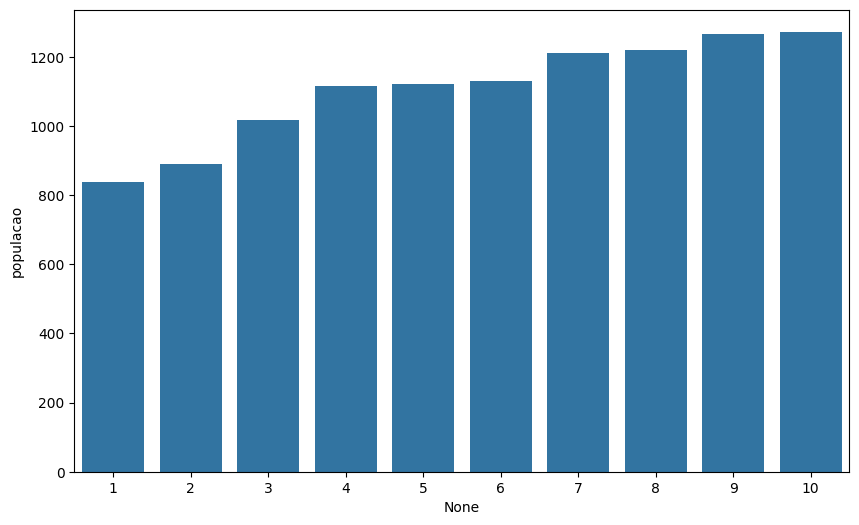

In [43]:
# código para gerar a visualização
import matplotlib.pyplot as plt
import seaborn as sns


cidades_menos_populosas = brasil_df[['cidade', 'populacao', 'regiao', 'sigla']].sort_values(by='populacao', ascending=True).head(10)
cidades_menos_populosas = cidades_menos_populosas.reset_index(drop=True)
cidades_menos_populosas.index += 1

plt.figure(figsize=(10, 6))
sns.barplot(x=cidades_menos_populosas.index, y=cidades_menos_populosas['populacao'])

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

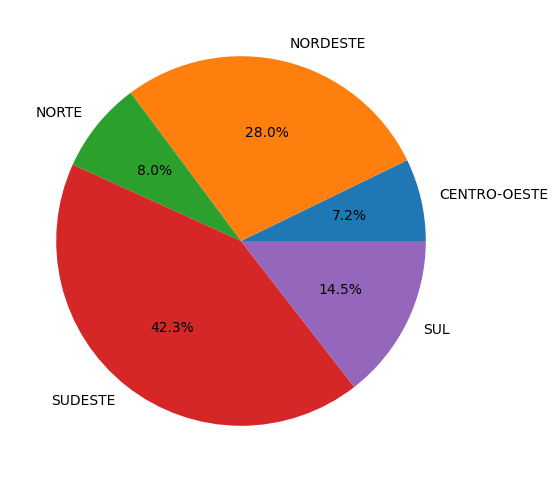

In [44]:
# código para gerar a visualização
import matplotlib.pyplot as plt
import seaborn as sns

populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()

plt.figure(figsize=(10, 6))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%')
plt